In [1]:
from tokenize import PlainToken
import torch
import torch.nn as nn
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch.multiprocessing as mp
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
import pandas as pd
import numpy as np
import time
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm

from NeuralNets import Network
import os
# Set multiprocessing start method
mp.set_start_method('spawn', force=True)

# Set default tensor type
d_type = torch.float32
torch.set_default_dtype(d_type)
import warnings
warnings.filterwarnings("ignore")


/opt/anaconda3/envs/deeprl/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [3]:
from Path_Model import MVPathModel
from Path_MKV_Solver import PathMKV
from Parameters import DefaultParams

In [4]:
d = 1 # dimension of Xt
paramsB = DefaultParams(d, "B").params
paramsA = DefaultParams(d, "A").params
paramsX = DefaultParams(d, "X").params
paramsD = DefaultParams(d, "XtAt", input_param=3*d).params
paramsM = DefaultParams(d, "Xt", input_param=2*d).params

In [5]:
setup_B = MVPathModel(paramsB)
setup_A = MVPathModel(paramsA)
setup_X = MVPathModel(paramsX)
setup_D = MVPathModel(paramsD)
setup_M = MVPathModel(paramsM)

In [8]:
net_control_B = Network(paramsB["net"]) 
# # Load all models from file
old_filename = 'path_B_d_1'
loaded = torch.load("outputNN/" + old_filename + ".pth")
net_control_B.load_state_dict(loaded['net_actor'])

setup_B = MVPathModel(paramsB)
solver_B = PathMKV(setup_B, paramsB, saved_NN_file=old_filename)



Loading pre-trained model from outputNN/path_B_d_1.pth
Model loaded successfully.
current filename: path_B_d_1


In [9]:
net_control_A = Network(paramsA["net"]) 
# Load all models from file
old_filename = 'path_A_d_1'
loaded = torch.load("outputNN/" + old_filename + ".pth")
net_control_A.load_state_dict(loaded['net_actor'])

setup_A = MVPathModel(paramsA)
solver_A = PathMKV(setup_A, paramsA, saved_NN_file=old_filename)



Loading pre-trained model from outputNN/path_A_d_1.pth
Model loaded successfully.
current filename: path_A_d_1


In [10]:
net_control_X = Network(paramsX["net"]) 
# Load all models from file
old_filename = 'path_X_d_1'
loaded = torch.load("outputNN/" + old_filename + ".pth")
net_control_X.load_state_dict(loaded['net_actor'])

setup_X = MVPathModel(paramsX)
solver_X = PathMKV(setup_X, paramsX, saved_NN_file=old_filename)



Loading pre-trained model from outputNN/path_X_d_1.pth
Model loaded successfully.
current filename: path_X_d_1


In [17]:
solver_M = PathMKV(setup_M, paramsM)
solver_M.train_players()
solver_M.train_players()
solver_M.save_NN()
solver_M.save_loss()


⚠️ Pre-trained model not found at outputNN/.pth. Starting from scratch.
current filename: path_Xt_d_1


100%|██████████| 50/50 [00:38<00:00,  1.31it/s]


It: 0, loss_training: 1.0599, loss_validation: 1.0834
Updated learning rate: 0.001


100%|██████████| 50/50 [00:35<00:00,  1.42it/s]


It: 1, loss_training: 1.0302, loss_validation: 1.0419
Updated learning rate: 0.001


100%|██████████| 50/50 [00:37<00:00,  1.32it/s]


It: 2, loss_training: 1.0584, loss_validation: 0.9728
Updated learning rate: 0.001


100%|██████████| 50/50 [00:37<00:00,  1.34it/s]


It: 3, loss_training: 1.0535, loss_validation: 0.9836
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.31it/s]


It: 4, loss_training: 0.8771, loss_validation: 1.0669
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.30it/s]


It: 5, loss_training: 0.9606, loss_validation: 0.9347
Updated learning rate: 0.001


100%|██████████| 50/50 [00:37<00:00,  1.32it/s]


It: 6, loss_training: 0.9354, loss_validation: 0.8813
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.30it/s]


It: 7, loss_training: 0.8923, loss_validation: 0.9270
Updated learning rate: 0.001


100%|██████████| 50/50 [00:37<00:00,  1.34it/s]


It: 8, loss_training: 0.9547, loss_validation: 0.8551
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.30it/s]


It: 9, loss_training: 0.8672, loss_validation: 0.8318
Updated learning rate: 0.001


100%|██████████| 50/50 [00:37<00:00,  1.32it/s]


It: 10, loss_training: 0.8480, loss_validation: 0.7923
Updated learning rate: 0.001


100%|██████████| 50/50 [00:37<00:00,  1.34it/s]


It: 11, loss_training: 0.8337, loss_validation: 0.8840
Updated learning rate: 0.001


100%|██████████| 50/50 [00:37<00:00,  1.35it/s]


It: 12, loss_training: 0.8356, loss_validation: 0.8072
Updated learning rate: 0.001


100%|██████████| 50/50 [00:36<00:00,  1.38it/s]


It: 13, loss_training: 0.8201, loss_validation: 0.7917
Updated learning rate: 0.001


100%|██████████| 50/50 [00:37<00:00,  1.34it/s]


It: 14, loss_training: 0.7463, loss_validation: 0.8306
Updated learning rate: 0.001


100%|██████████| 50/50 [00:36<00:00,  1.36it/s]


It: 15, loss_training: 0.9739, loss_validation: 0.7859
Updated learning rate: 0.001


100%|██████████| 50/50 [00:35<00:00,  1.43it/s]


It: 16, loss_training: 0.6926, loss_validation: 0.6979
Updated learning rate: 0.001


100%|██████████| 50/50 [00:35<00:00,  1.41it/s]


It: 17, loss_training: 0.6810, loss_validation: 0.7995
Updated learning rate: 0.001


100%|██████████| 50/50 [00:35<00:00,  1.40it/s]


It: 18, loss_training: 0.6485, loss_validation: 0.7147
Updated learning rate: 0.001


100%|██████████| 50/50 [00:36<00:00,  1.37it/s]


It: 19, loss_training: 0.6918, loss_validation: 0.6585
Updated learning rate: 0.001


100%|██████████| 50/50 [00:37<00:00,  1.34it/s]


It: 20, loss_training: 0.6589, loss_validation: 0.6972
Updated learning rate: 0.001


100%|██████████| 50/50 [00:36<00:00,  1.35it/s]


It: 21, loss_training: 0.6465, loss_validation: 0.6345
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.32it/s]


It: 22, loss_training: 0.5775, loss_validation: 0.6926
Updated learning rate: 0.001


100%|██████████| 50/50 [00:35<00:00,  1.40it/s]


It: 23, loss_training: 0.5399, loss_validation: 0.6117
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.29it/s]


It: 24, loss_training: 0.6113, loss_validation: 0.6093
Updated learning rate: 0.001


100%|██████████| 50/50 [00:37<00:00,  1.35it/s]


It: 25, loss_training: 0.5745, loss_validation: 0.5613
Updated learning rate: 0.001


100%|██████████| 50/50 [00:37<00:00,  1.34it/s]


It: 26, loss_training: 0.5469, loss_validation: 0.5839
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.29it/s]


It: 27, loss_training: 0.6202, loss_validation: 0.5884
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.31it/s]


It: 28, loss_training: 0.5516, loss_validation: 0.6396
Updated learning rate: 0.001


100%|██████████| 50/50 [00:37<00:00,  1.35it/s]


It: 29, loss_training: 0.5387, loss_validation: 0.6208
Updated learning rate: 0.001


100%|██████████| 50/50 [00:37<00:00,  1.34it/s]


It: 30, loss_training: 0.4687, loss_validation: 0.5292
Updated learning rate: 0.001


100%|██████████| 50/50 [00:35<00:00,  1.39it/s]


It: 31, loss_training: 0.5331, loss_validation: 0.5315
Updated learning rate: 0.001


100%|██████████| 50/50 [00:36<00:00,  1.36it/s]


It: 32, loss_training: 0.4763, loss_validation: 0.5136
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.29it/s]


It: 33, loss_training: 0.5163, loss_validation: 0.4860
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.31it/s]


It: 34, loss_training: 0.5530, loss_validation: 0.4725
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.31it/s]


It: 35, loss_training: 0.4740, loss_validation: 0.5019
Updated learning rate: 0.001


100%|██████████| 50/50 [00:37<00:00,  1.34it/s]


It: 36, loss_training: 0.4726, loss_validation: 0.4721
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.29it/s]


It: 37, loss_training: 0.4795, loss_validation: 0.4417
Updated learning rate: 0.001


100%|██████████| 50/50 [00:35<00:00,  1.40it/s]


It: 38, loss_training: 0.4155, loss_validation: 0.4581
Updated learning rate: 0.001


100%|██████████| 50/50 [00:37<00:00,  1.33it/s]


It: 39, loss_training: 0.4888, loss_validation: 0.4434
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.27it/s]


It: 40, loss_training: 0.4590, loss_validation: 0.5803
Updated learning rate: 0.001


100%|██████████| 50/50 [00:37<00:00,  1.32it/s]


It: 41, loss_training: 0.4493, loss_validation: 0.4098
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.30it/s]


It: 42, loss_training: 0.3935, loss_validation: 0.4328
Updated learning rate: 0.001


100%|██████████| 50/50 [00:37<00:00,  1.32it/s]


It: 43, loss_training: 0.4046, loss_validation: 0.4205
Updated learning rate: 0.001


100%|██████████| 50/50 [00:34<00:00,  1.45it/s]


It: 44, loss_training: 0.4263, loss_validation: 0.4614
Updated learning rate: 0.001


100%|██████████| 50/50 [00:36<00:00,  1.37it/s]


It: 45, loss_training: 0.4030, loss_validation: 0.3850
Updated learning rate: 0.001


100%|██████████| 50/50 [00:37<00:00,  1.33it/s]


It: 46, loss_training: 0.4333, loss_validation: 0.3992
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.29it/s]


It: 47, loss_training: 0.4695, loss_validation: 0.4851
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.31it/s]


It: 48, loss_training: 0.3964, loss_validation: 0.3748
Updated learning rate: 0.001


100%|██████████| 50/50 [00:36<00:00,  1.38it/s]


It: 49, loss_training: 0.5067, loss_validation: 0.3465
Updated learning rate: 0.001


100%|██████████| 50/50 [00:36<00:00,  1.35it/s]


It: 0, loss_training: 0.4318, loss_validation: 0.4118
Updated learning rate: 0.001


100%|██████████| 50/50 [00:37<00:00,  1.34it/s]


It: 1, loss_training: 0.4113, loss_validation: 0.4082
Updated learning rate: 0.001


100%|██████████| 50/50 [00:37<00:00,  1.33it/s]


It: 2, loss_training: 0.3803, loss_validation: 0.3346
Updated learning rate: 0.001


100%|██████████| 50/50 [00:35<00:00,  1.42it/s]


It: 3, loss_training: 0.4061, loss_validation: 0.3746
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.31it/s]


It: 4, loss_training: 0.3943, loss_validation: 0.3652
Updated learning rate: 0.001


100%|██████████| 50/50 [00:37<00:00,  1.34it/s]


It: 5, loss_training: 0.3560, loss_validation: 0.3701
Updated learning rate: 0.001


100%|██████████| 50/50 [00:37<00:00,  1.34it/s]


It: 6, loss_training: 0.3168, loss_validation: 0.3597
Updated learning rate: 0.001


100%|██████████| 50/50 [00:37<00:00,  1.35it/s]


It: 7, loss_training: 0.3324, loss_validation: 0.3624
Updated learning rate: 0.001


100%|██████████| 50/50 [00:36<00:00,  1.36it/s]


It: 8, loss_training: 0.3219, loss_validation: 0.3420
Updated learning rate: 0.001


100%|██████████| 50/50 [00:37<00:00,  1.32it/s]


It: 9, loss_training: 0.3459, loss_validation: 0.3648
Updated learning rate: 0.001


100%|██████████| 50/50 [00:36<00:00,  1.36it/s]


It: 10, loss_training: 0.3246, loss_validation: 0.3525
Updated learning rate: 0.001


100%|██████████| 50/50 [00:37<00:00,  1.32it/s]


It: 11, loss_training: 0.3359, loss_validation: 0.3538
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.31it/s]


It: 12, loss_training: 0.3811, loss_validation: 0.3137
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.29it/s]


It: 13, loss_training: 0.3336, loss_validation: 0.3296
Updated learning rate: 0.001


100%|██████████| 50/50 [00:36<00:00,  1.37it/s]


It: 14, loss_training: 0.3221, loss_validation: 0.3328
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.31it/s]


It: 15, loss_training: 0.3075, loss_validation: 0.3156
Updated learning rate: 0.001


100%|██████████| 50/50 [00:35<00:00,  1.41it/s]


It: 16, loss_training: 0.3296, loss_validation: 0.2814
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.31it/s]


It: 17, loss_training: 0.3165, loss_validation: 0.3353
Updated learning rate: 0.001


100%|██████████| 50/50 [00:35<00:00,  1.41it/s]


It: 18, loss_training: 0.3275, loss_validation: 0.3383
Updated learning rate: 0.001


100%|██████████| 50/50 [00:35<00:00,  1.41it/s]


It: 19, loss_training: 0.3850, loss_validation: 0.2909
Updated learning rate: 0.001


100%|██████████| 50/50 [00:35<00:00,  1.39it/s]


It: 20, loss_training: 0.2728, loss_validation: 0.3356
Updated learning rate: 0.001


100%|██████████| 50/50 [00:36<00:00,  1.37it/s]


It: 21, loss_training: 0.3143, loss_validation: 0.3188
Updated learning rate: 0.001


100%|██████████| 50/50 [00:36<00:00,  1.38it/s]


It: 22, loss_training: 0.2764, loss_validation: 0.3091
Updated learning rate: 0.001


100%|██████████| 50/50 [00:35<00:00,  1.39it/s]


It: 23, loss_training: 0.2901, loss_validation: 0.2794
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.28it/s]


It: 24, loss_training: 0.3109, loss_validation: 0.2860
Updated learning rate: 0.001


100%|██████████| 50/50 [00:37<00:00,  1.35it/s]


It: 25, loss_training: 0.2933, loss_validation: 0.2818
Updated learning rate: 0.001


100%|██████████| 50/50 [00:37<00:00,  1.34it/s]


It: 26, loss_training: 0.3162, loss_validation: 0.3022
Updated learning rate: 0.001


100%|██████████| 50/50 [00:36<00:00,  1.36it/s]


It: 27, loss_training: 0.3000, loss_validation: 0.3774
Updated learning rate: 0.001


100%|██████████| 50/50 [00:37<00:00,  1.34it/s]


It: 28, loss_training: 0.2913, loss_validation: 0.3076
Updated learning rate: 0.001


100%|██████████| 50/50 [00:36<00:00,  1.37it/s]


It: 29, loss_training: 0.2908, loss_validation: 0.2938
Updated learning rate: 0.001


100%|██████████| 50/50 [00:37<00:00,  1.33it/s]


It: 30, loss_training: 0.2747, loss_validation: 0.2779
Updated learning rate: 0.001


100%|██████████| 50/50 [00:32<00:00,  1.53it/s]


It: 31, loss_training: 0.3126, loss_validation: 0.2699
Updated learning rate: 0.001


100%|██████████| 50/50 [00:30<00:00,  1.62it/s]


It: 32, loss_training: 0.2886, loss_validation: 0.3005
Updated learning rate: 0.001


100%|██████████| 50/50 [00:27<00:00,  1.83it/s]


It: 33, loss_training: 0.3114, loss_validation: 0.2950
Updated learning rate: 0.001


100%|██████████| 50/50 [00:30<00:00,  1.65it/s]


It: 34, loss_training: 0.2828, loss_validation: 0.2786
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.28it/s]


It: 35, loss_training: 0.2839, loss_validation: 0.2901
Updated learning rate: 0.001


100%|██████████| 50/50 [00:35<00:00,  1.43it/s]


It: 36, loss_training: 0.2857, loss_validation: 0.2906
Updated learning rate: 0.001


100%|██████████| 50/50 [00:37<00:00,  1.32it/s]


It: 37, loss_training: 0.3151, loss_validation: 0.2726
Updated learning rate: 0.001


100%|██████████| 50/50 [00:35<00:00,  1.39it/s]


It: 38, loss_training: 0.2804, loss_validation: 0.2954
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.27it/s]


It: 39, loss_training: 0.2822, loss_validation: 0.2729
Updated learning rate: 0.001


100%|██████████| 50/50 [00:37<00:00,  1.34it/s]


It: 40, loss_training: 0.2816, loss_validation: 0.2572
Updated learning rate: 0.001


100%|██████████| 50/50 [00:35<00:00,  1.40it/s]


It: 41, loss_training: 0.2777, loss_validation: 0.2915
Updated learning rate: 0.001


100%|██████████| 50/50 [00:37<00:00,  1.35it/s]


It: 42, loss_training: 0.2666, loss_validation: 0.2659
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.32it/s]


It: 43, loss_training: 0.2799, loss_validation: 0.2485
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.29it/s]


It: 44, loss_training: 0.2802, loss_validation: 0.3049
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.27it/s]


It: 45, loss_training: 0.2571, loss_validation: 0.2710
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.31it/s]


It: 46, loss_training: 0.2599, loss_validation: 0.2698
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.27it/s]


It: 47, loss_training: 0.2706, loss_validation: 0.2875
Updated learning rate: 0.001


100%|██████████| 50/50 [00:37<00:00,  1.33it/s]


It: 48, loss_training: 0.2577, loss_validation: 0.2698
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.29it/s]


It: 49, loss_training: 0.2957, loss_validation: 0.2920
Updated learning rate: 0.001
The NN weights are saved in
outputNN/path_Xt_d_1.pth
The loss data is saved in
outputLoss/path_Xt_d_1_val_loss.csv


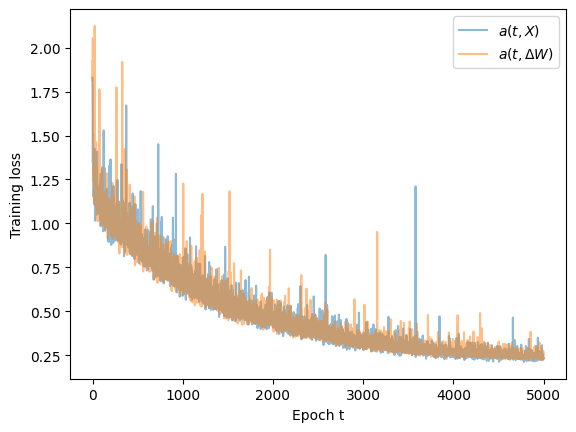

In [27]:
# # plt.plot(solver_D.training_cost_list)
# df1 = pd.read_csv("outputLoss/path_Ad_1_d_1_val_loss.csv")
# plt.plot(df1, alpha=0.5, label=r"$a(t, A)$")
# # plt.plot(solver_D.training_cost_list[:5000], alpha=0.5, label=r"$a(t, X_t, A_t)$")
# # plt.plot(solver_B.training_cost_list)

df2 = pd.read_csv("outputLoss/path_X_d_1_val_loss.csv")
plt.plot(list(df2.values[:,0]), alpha=0.5, label=r"$a(t, X)$")

# plt.plot(solver_M.training_cost_list, alpha=0.5, label=r"a(t, X_t)")

df = pd.read_csv("outputLoss/path_B_d_1_val_loss.csv")
plt.plot(list(df.values[:,0]), alpha=0.5, label=r"$a(t, \Delta W)$")



plt.legend()
plt.xlabel("Epoch t")
plt.ylabel("Training loss")
plt.show()

In [11]:
# solver_B = PathMKV(setup_B, paramsB)
# solver_B.train_players()
# solver_B.train_players()

In [12]:
# solver_A = PathMKV(setup_A, paramsA)
# solver_A.train_players()
# solver_A.train_players()
# solver_A.save_NN()
# solver_A.save_loss()

In [13]:
# plt.plot(np.array(solver_A.training_cost_list) - np.array(solver_B.training_cost_list))
# plt.plot(solver_B.validation_list)
# plt.plot(solver_B.training_cost_list, alpha=0.5)

In [ ]:
solver_X = PathMKV(setup_X, paramsX)
solver_X.train_players()
solver_X.train_players()
solver_X.save_NN()
solver_X.save_loss()

⚠️ Pre-trained model not found at outputNN/.pth. Starting from scratch.


current filename: path_X_d_1


100%|██████████| 50/50 [00:42<00:00,  1.18it/s]


It: 0, loss_training: 1.1201, loss_validation: 1.0362
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.28it/s]


It: 1, loss_training: 1.0929, loss_validation: 1.0584
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.29it/s]


It: 2, loss_training: 1.0995, loss_validation: 1.0747
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.27it/s]


It: 3, loss_training: 1.3644, loss_validation: 1.2085
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.23it/s]


It: 4, loss_training: 0.9927, loss_validation: 1.0277
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.22it/s]


It: 5, loss_training: 1.0014, loss_validation: 1.0287
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.25it/s]


It: 6, loss_training: 0.8135, loss_validation: 0.9870
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.23it/s]


It: 7, loss_training: 0.8877, loss_validation: 0.9127
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.23it/s]


It: 8, loss_training: 0.8309, loss_validation: 1.0029
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.24it/s]


It: 9, loss_training: 0.8305, loss_validation: 1.0456
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.25it/s]


It: 10, loss_training: 0.8302, loss_validation: 0.8480
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.25it/s]


It: 11, loss_training: 0.9255, loss_validation: 0.8314
Updated learning rate: 0.001


100%|██████████| 50/50 [00:42<00:00,  1.18it/s]


It: 12, loss_training: 0.8137, loss_validation: 0.7559
Updated learning rate: 0.001


100%|██████████| 50/50 [00:41<00:00,  1.20it/s]


It: 13, loss_training: 0.7786, loss_validation: 0.7934
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.27it/s]


It: 14, loss_training: 0.8051, loss_validation: 0.7810
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.24it/s]


It: 15, loss_training: 0.7623, loss_validation: 0.8190
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.23it/s]


It: 16, loss_training: 0.7282, loss_validation: 0.8024
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.24it/s]


It: 17, loss_training: 0.6888, loss_validation: 0.6840
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.24it/s]


It: 18, loss_training: 0.6871, loss_validation: 0.7956
Updated learning rate: 0.001


100%|██████████| 50/50 [00:43<00:00,  1.14it/s]


It: 19, loss_training: 0.6530, loss_validation: 0.7199
Updated learning rate: 0.001


100%|██████████| 50/50 [00:43<00:00,  1.16it/s]


It: 20, loss_training: 0.6030, loss_validation: 0.6705
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.24it/s]


It: 21, loss_training: 0.6398, loss_validation: 0.5969
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.24it/s]


It: 22, loss_training: 0.6483, loss_validation: 0.6899
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.26it/s]


It: 23, loss_training: 0.6021, loss_validation: 0.5879
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.29it/s]


It: 24, loss_training: 0.5739, loss_validation: 0.6714
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.31it/s]


It: 25, loss_training: 0.5855, loss_validation: 0.6129
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.27it/s]


It: 26, loss_training: 0.6461, loss_validation: 0.5596
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.23it/s]


It: 27, loss_training: 0.6030, loss_validation: 0.5991
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.28it/s]


It: 28, loss_training: 0.5365, loss_validation: 0.5460
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.25it/s]


It: 29, loss_training: 0.5669, loss_validation: 0.4951
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.22it/s]


It: 30, loss_training: 0.5891, loss_validation: 0.5661
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.25it/s]


It: 31, loss_training: 0.4872, loss_validation: 0.5559
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.27it/s]


It: 32, loss_training: 0.4944, loss_validation: 0.5070
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.22it/s]


It: 33, loss_training: 0.5160, loss_validation: 0.5279
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.27it/s]


It: 34, loss_training: 0.5657, loss_validation: 0.5028
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.22it/s]


It: 35, loss_training: 0.5322, loss_validation: 0.5305
Updated learning rate: 0.001


100%|██████████| 50/50 [00:42<00:00,  1.19it/s]


It: 36, loss_training: 0.5194, loss_validation: 0.4758
Updated learning rate: 0.001


100%|██████████| 50/50 [00:41<00:00,  1.21it/s]


It: 37, loss_training: 0.4302, loss_validation: 0.4591
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.23it/s]


It: 38, loss_training: 0.4465, loss_validation: 0.4499
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.25it/s]


It: 39, loss_training: 0.4768, loss_validation: 0.5521
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.25it/s]


It: 40, loss_training: 0.4913, loss_validation: 0.6035
Updated learning rate: 0.001


100%|██████████| 50/50 [00:41<00:00,  1.22it/s]


It: 41, loss_training: 0.4203, loss_validation: 0.4015
Updated learning rate: 0.001


100%|██████████| 50/50 [00:41<00:00,  1.22it/s]


It: 42, loss_training: 0.3961, loss_validation: 0.5228
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.24it/s]


It: 43, loss_training: 0.4319, loss_validation: 0.4004
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.22it/s]


It: 44, loss_training: 0.4275, loss_validation: 0.4067
Updated learning rate: 0.001


100%|██████████| 50/50 [00:41<00:00,  1.21it/s]


It: 45, loss_training: 0.4042, loss_validation: 0.4056
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.22it/s]


It: 46, loss_training: 0.3626, loss_validation: 0.4209
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.26it/s]


It: 47, loss_training: 0.4493, loss_validation: 0.4009
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.24it/s]


It: 48, loss_training: 0.4224, loss_validation: 0.4103
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.24it/s]


It: 49, loss_training: 0.3521, loss_validation: 0.3714
Updated learning rate: 0.001


100%|██████████| 50/50 [00:41<00:00,  1.20it/s]


It: 0, loss_training: 0.3870, loss_validation: 0.3603
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.25it/s]


It: 1, loss_training: 0.3625, loss_validation: 0.3491
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.32it/s]


It: 2, loss_training: 0.4038, loss_validation: 0.3060
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.27it/s]


It: 3, loss_training: 0.3571, loss_validation: 0.3514
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.29it/s]


It: 4, loss_training: 0.4498, loss_validation: 0.3866
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.25it/s]


It: 5, loss_training: 0.3510, loss_validation: 0.3114
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.29it/s]


It: 6, loss_training: 0.3290, loss_validation: 0.3347
Updated learning rate: 0.001


100%|██████████| 50/50 [00:41<00:00,  1.20it/s]


It: 7, loss_training: 0.3045, loss_validation: 0.3122
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.28it/s]


It: 8, loss_training: 0.2900, loss_validation: 0.3494
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.24it/s]


It: 9, loss_training: 0.3201, loss_validation: 0.3681
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.25it/s]


It: 10, loss_training: 0.2983, loss_validation: 0.3164
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.22it/s]


It: 11, loss_training: 0.3490, loss_validation: 0.3263
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.25it/s]


It: 12, loss_training: 0.2732, loss_validation: 0.3625
Updated learning rate: 0.001


100%|██████████| 50/50 [00:41<00:00,  1.22it/s]


It: 13, loss_training: 0.3236, loss_validation: 0.3075
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.25it/s]


It: 14, loss_training: 0.2814, loss_validation: 0.3128
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.26it/s]


It: 15, loss_training: 0.3139, loss_validation: 0.3384
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.27it/s]


It: 16, loss_training: 0.2869, loss_validation: 0.2909
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.28it/s]


It: 17, loss_training: 0.2730, loss_validation: 0.2796
Updated learning rate: 0.001


100%|██████████| 50/50 [00:34<00:00,  1.43it/s]


It: 18, loss_training: 0.2824, loss_validation: 0.2795
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.26it/s]


It: 19, loss_training: 0.2685, loss_validation: 0.3017
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.24it/s]


It: 20, loss_training: 0.2666, loss_validation: 0.2986
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.25it/s]


It: 21, loss_training: 0.3821, loss_validation: 0.2688
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.29it/s]


It: 22, loss_training: 0.2690, loss_validation: 0.4466
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.25it/s]


It: 23, loss_training: 0.2581, loss_validation: 0.2762
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.26it/s]


It: 24, loss_training: 0.2617, loss_validation: 0.2733
Updated learning rate: 0.001


100%|██████████| 50/50 [00:41<00:00,  1.20it/s]


It: 25, loss_training: 0.2527, loss_validation: 0.2526
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.24it/s]


It: 26, loss_training: 0.2716, loss_validation: 0.2855
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.27it/s]


It: 27, loss_training: 0.2967, loss_validation: 0.2452
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.25it/s]


It: 28, loss_training: 0.2539, loss_validation: 0.2842
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.23it/s]


It: 29, loss_training: 0.2504, loss_validation: 0.2885
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.27it/s]


It: 30, loss_training: 0.2475, loss_validation: 0.2748
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.25it/s]


It: 31, loss_training: 0.2604, loss_validation: 0.2523
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.26it/s]


It: 32, loss_training: 0.2702, loss_validation: 0.2646
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.25it/s]


It: 33, loss_training: 0.2536, loss_validation: 0.2672
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.27it/s]


It: 34, loss_training: 0.2500, loss_validation: 0.2517
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.27it/s]


It: 35, loss_training: 0.2324, loss_validation: 0.3072
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.28it/s]


It: 36, loss_training: 0.2918, loss_validation: 0.2462
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.24it/s]


It: 37, loss_training: 0.2457, loss_validation: 0.2464
Updated learning rate: 0.001


100%|██████████| 50/50 [00:43<00:00,  1.14it/s]


It: 38, loss_training: 0.2564, loss_validation: 0.2628
Updated learning rate: 0.001


100%|██████████| 50/50 [00:42<00:00,  1.17it/s]


It: 39, loss_training: 0.2411, loss_validation: 0.2444
Updated learning rate: 0.001


100%|██████████| 50/50 [00:41<00:00,  1.22it/s]


It: 40, loss_training: 0.2473, loss_validation: 0.2499
Updated learning rate: 0.001


100%|██████████| 50/50 [00:41<00:00,  1.19it/s]


It: 41, loss_training: 0.2737, loss_validation: 0.2476
Updated learning rate: 0.001


100%|██████████| 50/50 [00:41<00:00,  1.19it/s]


It: 42, loss_training: 0.2638, loss_validation: 0.2452
Updated learning rate: 0.001


100%|██████████| 50/50 [00:42<00:00,  1.17it/s]


It: 43, loss_training: 0.2288, loss_validation: 0.2613
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.26it/s]


It: 44, loss_training: 0.2351, loss_validation: 0.2770
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.22it/s]


It: 45, loss_training: 0.2486, loss_validation: 0.2627
Updated learning rate: 0.001


100%|██████████| 50/50 [00:41<00:00,  1.21it/s]


It: 46, loss_training: 0.2541, loss_validation: 0.2649
Updated learning rate: 0.001


100%|██████████| 50/50 [00:41<00:00,  1.20it/s]


It: 47, loss_training: 0.2297, loss_validation: 0.2272
Updated learning rate: 0.001


100%|██████████| 50/50 [00:41<00:00,  1.20it/s]


It: 48, loss_training: 0.2461, loss_validation: 0.2482
Updated learning rate: 0.001


100%|██████████| 50/50 [00:41<00:00,  1.22it/s]


It: 49, loss_training: 0.2347, loss_validation: 0.2613
Updated learning rate: 0.001
The NN weights are saved in
outputNN/path_X_d_1.pth
The loss data is saved in
outputLoss/path_X_d_1_val_loss.csv


: 

In [6]:
solver_B = PathMKV(setup_B, paramsB)
solver_B.train_players()


⚠️ Pre-trained model not found at outputNN/.pth. Starting from scratch.
current filename: path_B_d_1


100%|██████████| 50/50 [00:40<00:00,  1.22it/s]


It: 0, loss_training: 1.1545, loss_validation: 1.0883
Updated learning rate: 0.001


100%|██████████| 50/50 [00:46<00:00,  1.09it/s]


It: 1, loss_training: 1.0696, loss_validation: 0.9826
Updated learning rate: 0.001


100%|██████████| 50/50 [00:42<00:00,  1.19it/s]


It: 2, loss_training: 1.1738, loss_validation: 1.0019
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.25it/s]


It: 3, loss_training: 1.0349, loss_validation: 1.0458
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.31it/s]


It: 4, loss_training: 1.0001, loss_validation: 1.0022
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.31it/s]


It: 5, loss_training: 0.8853, loss_validation: 0.9569
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.28it/s]


It: 6, loss_training: 1.1082, loss_validation: 1.0254
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.31it/s]


It: 7, loss_training: 0.9787, loss_validation: 0.9677
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.28it/s]


It: 8, loss_training: 0.9633, loss_validation: 0.8306
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.27it/s]


It: 9, loss_training: 0.9015, loss_validation: 0.8596
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.30it/s]


It: 10, loss_training: 0.7921, loss_validation: 0.8501
Updated learning rate: 0.001


100%|██████████| 50/50 [00:37<00:00,  1.32it/s]


It: 11, loss_training: 0.8254, loss_validation: 0.8293
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.29it/s]


It: 12, loss_training: 0.8190, loss_validation: 0.8131
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.29it/s]


It: 13, loss_training: 0.7551, loss_validation: 0.7312
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.28it/s]


It: 14, loss_training: 0.7514, loss_validation: 0.7955
Updated learning rate: 0.001


100%|██████████| 50/50 [00:37<00:00,  1.33it/s]


It: 15, loss_training: 0.7338, loss_validation: 0.7564
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.28it/s]


It: 16, loss_training: 0.7159, loss_validation: 0.7444
Updated learning rate: 0.001


100%|██████████| 50/50 [00:34<00:00,  1.46it/s]


It: 17, loss_training: 0.7118, loss_validation: 0.7628
Updated learning rate: 0.001


100%|██████████| 50/50 [00:36<00:00,  1.37it/s]


It: 18, loss_training: 0.7524, loss_validation: 0.6602
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.28it/s]


It: 19, loss_training: 0.6759, loss_validation: 0.6521
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.26it/s]


It: 20, loss_training: 0.6687, loss_validation: 0.6523
Updated learning rate: 0.001


100%|██████████| 50/50 [00:36<00:00,  1.37it/s]


It: 21, loss_training: 0.5697, loss_validation: 0.6030
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.23it/s]


It: 22, loss_training: 0.6378, loss_validation: 0.6835
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.25it/s]


It: 23, loss_training: 0.5339, loss_validation: 0.5787
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.25it/s]


It: 24, loss_training: 0.6193, loss_validation: 0.5416
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.30it/s]


It: 25, loss_training: 0.6579, loss_validation: 0.5763
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.25it/s]


It: 26, loss_training: 0.5577, loss_validation: 0.6124
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.29it/s]


It: 27, loss_training: 0.5308, loss_validation: 0.5623
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.27it/s]


It: 28, loss_training: 0.6141, loss_validation: 0.5534
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.26it/s]


It: 29, loss_training: 0.5384, loss_validation: 0.5790
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.26it/s]


It: 30, loss_training: 0.4517, loss_validation: 0.5246
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.26it/s]


It: 31, loss_training: 0.5153, loss_validation: 0.5793
Updated learning rate: 0.001


100%|██████████| 50/50 [00:37<00:00,  1.32it/s]


It: 32, loss_training: 0.6123, loss_validation: 0.5675
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.26it/s]


It: 33, loss_training: 0.4885, loss_validation: 0.5077
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.26it/s]


It: 34, loss_training: 0.5849, loss_validation: 0.4869
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.28it/s]


It: 35, loss_training: 0.4823, loss_validation: 0.4168
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.28it/s]


It: 36, loss_training: 0.5180, loss_validation: 0.4576
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.22it/s]


It: 37, loss_training: 0.4165, loss_validation: 0.4554
Updated learning rate: 0.001


100%|██████████| 50/50 [00:41<00:00,  1.22it/s]


It: 38, loss_training: 0.4361, loss_validation: 0.4461
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.31it/s]


It: 39, loss_training: 0.5195, loss_validation: 0.4069
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.23it/s]


It: 40, loss_training: 0.3696, loss_validation: 0.4101
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.27it/s]


It: 41, loss_training: 0.3856, loss_validation: 0.4877
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.22it/s]


It: 42, loss_training: 0.4133, loss_validation: 0.5157
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.26it/s]


It: 43, loss_training: 0.4660, loss_validation: 0.3408
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.25it/s]


It: 44, loss_training: 0.4290, loss_validation: 0.4284
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.27it/s]


It: 45, loss_training: 0.4239, loss_validation: 0.4009
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.27it/s]


It: 46, loss_training: 0.4459, loss_validation: 0.4080
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.24it/s]


It: 47, loss_training: 0.4357, loss_validation: 0.3669
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.23it/s]


It: 48, loss_training: 0.3693, loss_validation: 0.3731
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.25it/s]


It: 49, loss_training: 0.3706, loss_validation: 0.3517
Updated learning rate: 0.001


In [7]:
solver_B.train_players()
solver_B.save_NN()
solver_B.save_loss()

100%|██████████| 50/50 [00:41<00:00,  1.20it/s]


It: 0, loss_training: 0.4254, loss_validation: 0.3345
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.29it/s]


It: 1, loss_training: 0.3653, loss_validation: 0.4064
Updated learning rate: 0.001


100%|██████████| 50/50 [00:41<00:00,  1.21it/s]


It: 2, loss_training: 0.3947, loss_validation: 0.3414
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.24it/s]


It: 3, loss_training: 0.3510, loss_validation: 0.3457
Updated learning rate: 0.001


100%|██████████| 50/50 [00:42<00:00,  1.17it/s]


It: 4, loss_training: 0.3763, loss_validation: 0.3522
Updated learning rate: 0.001


100%|██████████| 50/50 [00:41<00:00,  1.21it/s]


It: 5, loss_training: 0.3225, loss_validation: 0.3022
Updated learning rate: 0.001


100%|██████████| 50/50 [00:41<00:00,  1.19it/s]


It: 6, loss_training: 0.3500, loss_validation: 0.3662
Updated learning rate: 0.001


100%|██████████| 50/50 [00:41<00:00,  1.22it/s]


It: 7, loss_training: 0.3454, loss_validation: 0.3423
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.24it/s]


It: 8, loss_training: 0.3310, loss_validation: 0.3610
Updated learning rate: 0.001


100%|██████████| 50/50 [00:41<00:00,  1.22it/s]


It: 9, loss_training: 0.3219, loss_validation: 0.3328
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.29it/s]


It: 10, loss_training: 0.3349, loss_validation: 0.2936
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.31it/s]


It: 11, loss_training: 0.3120, loss_validation: 0.2959
Updated learning rate: 0.001


100%|██████████| 50/50 [00:37<00:00,  1.35it/s]


It: 12, loss_training: 0.2885, loss_validation: 0.3549
Updated learning rate: 0.001


100%|██████████| 50/50 [00:36<00:00,  1.38it/s]


It: 13, loss_training: 0.2726, loss_validation: 0.2964
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.23it/s]


It: 14, loss_training: 0.2858, loss_validation: 0.2960
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.23it/s]


It: 15, loss_training: 0.2982, loss_validation: 0.3138
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.26it/s]


It: 16, loss_training: 0.2881, loss_validation: 0.3079
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.24it/s]


It: 17, loss_training: 0.3388, loss_validation: 0.2944
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.23it/s]


It: 18, loss_training: 0.2749, loss_validation: 0.2903
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.23it/s]


It: 19, loss_training: 0.2963, loss_validation: 0.3222
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.25it/s]


It: 20, loss_training: 0.2658, loss_validation: 0.2970
Updated learning rate: 0.001


100%|██████████| 50/50 [00:41<00:00,  1.20it/s]


It: 21, loss_training: 0.3101, loss_validation: 0.2569
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.24it/s]


It: 22, loss_training: 0.2986, loss_validation: 0.3009
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.28it/s]


It: 23, loss_training: 0.2810, loss_validation: 0.2704
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.30it/s]


It: 24, loss_training: 0.3111, loss_validation: 0.2429
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.27it/s]


It: 25, loss_training: 0.2841, loss_validation: 0.2878
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.24it/s]


It: 26, loss_training: 0.2808, loss_validation: 0.2666
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.26it/s]


It: 27, loss_training: 0.2729, loss_validation: 0.2591
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.26it/s]


It: 28, loss_training: 0.2723, loss_validation: 0.2591
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.24it/s]


It: 29, loss_training: 0.2685, loss_validation: 0.2831
Updated learning rate: 0.001


100%|██████████| 50/50 [00:41<00:00,  1.21it/s]


It: 30, loss_training: 0.2863, loss_validation: 0.2626
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.26it/s]


It: 31, loss_training: 0.2459, loss_validation: 0.2638
Updated learning rate: 0.001


100%|██████████| 50/50 [00:41<00:00,  1.21it/s]


It: 32, loss_training: 0.2649, loss_validation: 0.2275
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.24it/s]


It: 33, loss_training: 0.2637, loss_validation: 0.2687
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.24it/s]


It: 34, loss_training: 0.2807, loss_validation: 0.2683
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.24it/s]


It: 35, loss_training: 0.2826, loss_validation: 0.2609
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.24it/s]


It: 36, loss_training: 0.2477, loss_validation: 0.2511
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.24it/s]


It: 37, loss_training: 0.2771, loss_validation: 0.2636
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.29it/s]


It: 38, loss_training: 0.2629, loss_validation: 0.2453
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.25it/s]


It: 39, loss_training: 0.2579, loss_validation: 0.2499
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.24it/s]


It: 40, loss_training: 0.2532, loss_validation: 0.2509
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.24it/s]


It: 41, loss_training: 0.3117, loss_validation: 0.2496
Updated learning rate: 0.001


100%|██████████| 50/50 [00:39<00:00,  1.26it/s]


It: 42, loss_training: 0.2748, loss_validation: 0.2428
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.23it/s]


It: 43, loss_training: 0.2474, loss_validation: 0.2485
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.24it/s]


It: 44, loss_training: 0.2434, loss_validation: 0.2396
Updated learning rate: 0.001


100%|██████████| 50/50 [00:38<00:00,  1.29it/s]


It: 45, loss_training: 0.2367, loss_validation: 0.2268
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.23it/s]


It: 46, loss_training: 0.2473, loss_validation: 0.2432
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.23it/s]


It: 47, loss_training: 0.2738, loss_validation: 0.2538
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.24it/s]


It: 48, loss_training: 0.2508, loss_validation: 0.2331
Updated learning rate: 0.001


100%|██████████| 50/50 [00:40<00:00,  1.24it/s]


It: 49, loss_training: 0.2268, loss_validation: 0.2403
Updated learning rate: 0.001
The NN weights are saved in
outputNN/path_B_d_1.pth
The loss data is saved in
outputLoss/path_B_d_1_val_loss.csv


In [ ]:
np.var(solver_A.training_cost_list[-500:]), np.var(solver_B.training_cost_list[-500:]), np.var(solver_X.training_cost_list[-500:])


# Example: training_loss is a list or array of length 5000
# training_loss = [...]

window_size = 200
n_windows = len(solver_A.training_cost_list) // window_size

# Compute variance per window
variances1 = [
    np.var(solver_A.training_cost_list[i*window_size:(i+1)*window_size])
    for i in range(n_windows)
]
variances2 = [
    np.var(solver_B.training_cost_list[i*window_size:(i+1)*window_size])
    for i in range(n_windows)
]
variances3 = [
    np.var(solver_X.training_cost_list[i*window_size:(i+1)*window_size])
    for i in range(n_windows)
]

# Plot
plt.figure(figsize=(8,4))
plt.plot(range(n_windows), variances1, marker='o')
plt.plot(range(n_windows), variances2, marker='o')
plt.plot(range(n_windows), variances3, marker='o')

plt.xlabel('Window index (each of 500 steps)')
plt.ylabel('Variance of loss')
plt.title('Variance of training loss per 500-step window')
plt.grid(True)
plt.show()

NameError: name 'solver_B' is not defined

In [ ]:
plt.plot(solver_A.training_cost_list,alpha=0.5)
# plt.plot(solver_X.training_cost_list[-2500:],alpha=0.5)
plt.plot(solver_B.training_cost_list,alpha=0.5)



In [36]:

# Example data
solver_B.M = 5000
setup_B.M = 5000

solver_A.M = 5000
setup_A.M = 5000
X_buffer1, _, _ =solver_A.simulation_paths()
X_path1 = torch.stack(X_buffer1, dim=1)  # [X0, X1, ..., XT]

X_buffer2, _, _ =solver_B.simulation_paths()
X_path2 = torch.stack(X_buffer2, dim=1)  # [X0, X1, ..., XT]

X1 = X_path1.detach().squeeze(-1).numpy()          # α₁
X2 = X_path2.detach().squeeze(-1).numpy()    # α₂


0.15379478 0.025602167
0.13462251 0.021493623


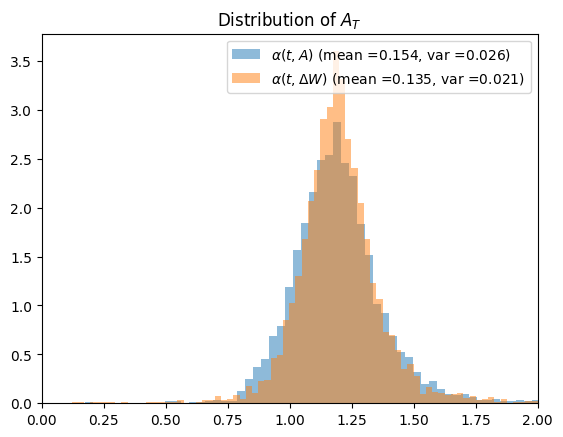

In [42]:


plt.style.use('default')
K = 1.25

AT_1 = np.abs(np.mean((X1), axis=1) - K)
X1_avg = np.mean((X1), axis=1)
# plt.figure(figsize=(7,4.5))
mean1 = np.mean(AT_1)
var1 = np.var(AT_1)
print(mean1, var1)
plt.hist(X1_avg, density=True, bins=150, alpha=0.5,   \
    label=r"$\alpha(t, A)$" + " (mean =" + f"{mean1:.3f}" + ", var =" + f"{var1:.3f})")


X2_avg = np.mean((X2), axis=1)
AT_2 = np.abs(np.mean((X2), axis=1) - K )
mean2 = np.mean(AT_2)
var2 = np.var(AT_2)
print(mean2, var2)

plt.hist(X2_avg, density=True, bins=150, alpha=0.5, \
    label=r"$\alpha(t, \Delta W)$" + " (mean =" + f"{mean2:.3f}" + ", var =" + f"{var2:.3f})")

plt.title("Distribution of " + r"$A_T$")
plt.legend()
plt.xlim([0,2])
plt.show()


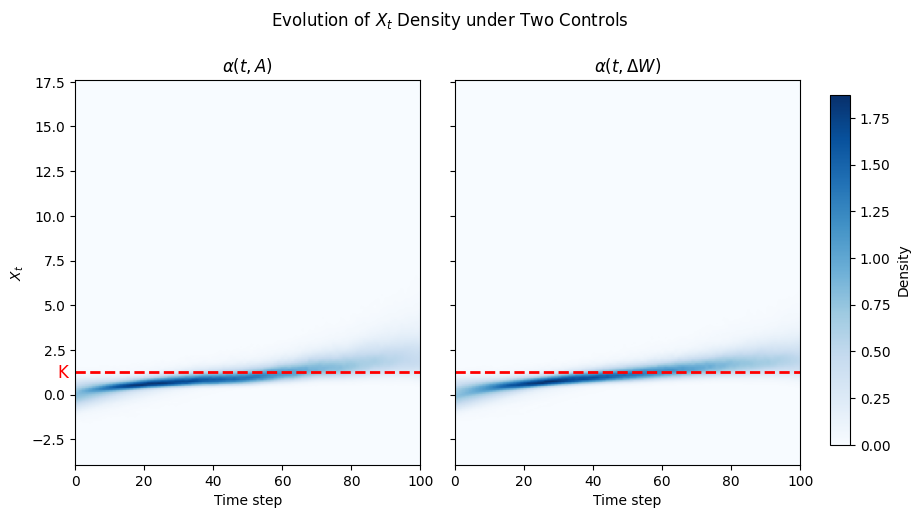

In [43]:
from scipy.stats import gaussian_kde

# 假设 X1, X2 已经定义
times = np.arange(101)
x_grid = np.linspace(min(X1.min(), X2.min()), max(X1.max(), X2.max()), 200)

def density_matrix(X):
    dens = np.zeros((len(x_grid), len(times)))
    for i, t in enumerate(times):
        kde = gaussian_kde(X[:, t])
        dens[:, i] = kde(x_grid)
    return dens

density1 = density_matrix(X1)
density2 = density_matrix(X2) 

fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# α₁ heatmap
im1 = axes[0].imshow(density1, aspect='auto', origin='lower',
                     extent=[0, 100, x_grid[0], x_grid[-1]],
                     cmap='Blues')
axes[0].axhline(y=1.25, color='red', linestyle='--', linewidth=2)
axes[0].set_title(r"$\alpha(t, A)$")
axes[0].set_xlabel("Time step")
axes[0].set_ylabel(r"$X_t$")

# α₂ heatmap
im2 = axes[1].imshow(density2, aspect='auto', origin='lower',
                     extent=[0, 100, x_grid[0], x_grid[-1]],
                     cmap='Blues')
axes[1].axhline(y=1.25, color='red', linestyle='--', linewidth=2)
axes[1].set_title(r"$\alpha(t, \Delta W)$")
axes[1].set_xlabel("Time step")
axes[0].annotate(
    "K",
    xy=(0, 1.25),           # 对应数据坐标 (x=0, y=1.25)
    xytext=(-5, 0),        # 向左偏移（像素单位）
    textcoords='offset points',
    color='red',
    fontsize=12,
    va='center',
    ha='right'
)
# 调整布局，留出右侧空间
plt.subplots_adjust(right=0.85, wspace=0.1)

# 在右侧单独添加 colorbar
cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(im2, cax=cbar_ax)
cbar.set_label("Density")

plt.suptitle("Evolution of $X_t$ Density under Two Controls", y=1.02)
plt.show()


In [ ]:
def generate_initial_condition(d, std, M, device, mu0):
    # Shape: (M, d)
    var0 = std**2 * torch.tensor(np.eye(d)).float().to(device) 

    L = torch.linalg.cholesky(var0)
    Gaussian_noise = torch.randn(M, d, device = device).float()
    x = mu0 + Gaussian_noise @ L.T 
    return x 

def simulation_paths(self):

    # Fetch a minibatch of simulated noise trajectories:
    # t: time grid, W: Brownian motions, B: common noise
    t, W, DW = self.fetch_minibatch()
    
    # Xi is the initial condition, repeat it M times for the batch
    X0 = generate_initial_condition(d, std=0.8, M=self.M, device=self.device, mu0=0)


    # Create local networks for all players and load stored parameters

    net_actor = Network(self.params_net, penalty=self.params_net["penalty"]).to(self.device)
    

    # Load previously saved parameters into local networks
    net_actor.load_state_dict(self.dict['net_actor'])

    # Call the loss function:
    # Get control type from parameters, default to path_dependent for backward compatibility
    X_buffer, loss = self.loss_function(net_actor, t, DW, X0)
    return X_buffer, loss, net_actor


In [ ]:
X_buffer1_shifted, _, _ = simulation_paths(solver_B)
X_path1_shifted = torch.stack(X_buffer1_shifted, dim=1)  # [X0, X1, ..., XT]

X_buffer2_shifted, _, _ = simulation_paths(solver_X)
X_path2_shifted = torch.stack(X_buffer2_shifted, dim=1)  # [X0, X1, ..., XT]

In [ ]:

X1 = X_path1_shifted.detach().squeeze(-1).numpy()          # α₁
X2 = X_path2_shifted.detach().squeeze(-1).numpy()    # α₂


plt.style.use('default')
K = 1.25

AT_1 = np.abs(np.mean((X1), axis=1) - K)
plt.figure(figsize=(7,4.5))
mean1 = np.mean(AT_1)
var1 = np.var(AT_1)
print(mean1, var1)
plt.hist(AT_1, density=True, bins=40, alpha=0.5,   \
    label=r"$\alpha_1$" + " (mean =" + f"{mean1:.3f}" + ", var =" + f"{var1:.3f})")


X2_minus_K = X2
AT_2 = np.abs(np.mean((X2), axis=1) - K)
mean2 = np.mean(AT_2)
var2 = np.var(AT_2)
print(mean2, var2)

plt.hist(AT_2, density=True, bins=40, alpha=0.5, \
    label=r"$\alpha_2$" + " (mean =" + f"{mean2:.3f}" + ", var =" + f"{var2:.3f})")

plt.title("Distribution of " + r"$|A_T - K|$")
plt.legend()

plt.show()


In [ ]:
STOP

In [ ]:
path_loss = pd.read_csv("outputLoss/path_dependent_BM_val_loss.csv")
plt.plot(path_loss, label=r"$a(t, \Delta W)$", alpha=0.5)

In [ ]:
solver_A = PathMKV(setup_A, paramsA)


In [ ]:
solver_B = PathMKV(setup_B, paramsB)


In [ ]:
solver_B.train_players()

In [ ]:
plt.plot(solver_B.training_cost_list, alpha=0.5)

In [ ]:
STOP

In [ ]:
loaded

In [ ]:
X_buffer_B, loss_B, _ = solver_B.simulation_paths()

In [ ]:
STOP

In [ ]:

control_type = ["path_dependent", "markovian"][0]
input_param = (N * (control_type == "path_dependent") + 2)*d
input_param

# ============================================================================
# Create control networks
# ============================================================================
setup = PathModel(params["equation"], device, kappa,sigma, q, T, eta, c, \
        mu_0 , sigma_0 )

In [ ]:
N

In [ ]:
self = PathMKV(net_control, setup, params)
t, W, DW = self.fetch_minibatch()

X0 = setup.generate_initial_condition()
X_buffer, loss = self.loss_function( net_control, t, DW, X0)


In [ ]:
self.control_type+ "_" +params["net"]["block_type"]

In [ ]:
X_buffer, loss, net_actor =self.simulation_paths()

In [ ]:
self.train_players()

In [ ]:
self.train_players()

In [ ]:
plt.plot(self.training_cost_list)

In [ ]:
control_type = ["path_dependent", "markovian"][1]
input_param = (N * (control_type == "path_dependent") + 2)*d
input_param





# ============================================================================
# Define all parameters 
# ============================================================================
params = {
    # Parameters of the game setup
    "equation": {
            "state_dim": d, "BM_dim": d, "u_dim": d, 
            "M": 500, # number of particles
            "N": N,# number of time intervals
            "T": T,
            "control_type": control_type
        },
    "train": {
        "lr_actor": 1e-3, "gamma_actor":0.8, "milestones_actor": [30000, 40000],
        "iteration": 50, "epochs": 50, "device": device,  
    },
    "net": {
        # Choose block type: "res" for ResNet block, "fc" for fully connected block
        "block_type": ["fc", "rnn"][1],
        "inputs": input_param, "output": d, 


        # RNN network parameters(only used when block_type="rnn")
        "width": 100, "depth": 4, #N + 10, "depth": 4, 
        "activation": "ReLU", "penalty": "Tanh",
        "params_act": {"Tanh": nn.Tanh(), "Tanhshrink": nn.Tanhshrink(), "ReLU": nn.ReLU(), "ReLU6": nn.ReLU6()},
        
        
        # Fully connected network parameters (only used when block_type="fc")
        "hidden_layers": [20, 20], #[N + 10, N + 10, N + 10],  #widths of hidden layers 
        "dropout_rate": 0.1,  # Add dropout for regularization
    },
}


# ============================================================================
# Create control networks
# ============================================================================
net_control = Network(params["net"]) 


device = "cpu"
# setup = MeanVariance(params["equation"], device)

self2 = deepMKV(net_control, setup, params)
print(self2.control_type+ "_" +params["net"]["block_type"])
# t, W, DW = self.fetch_minibatch()

# X0 = setup.generate_initial_condition()
# X_buffer, loss = self2.loss_function( net_control, t, DW, X0)
# X_buffer, loss, net_actor =self2.simulation_paths()

self2.train_players()

In [ ]:
plt.plot(self.training_cost_list)

In [ ]:
self.filename


In [ ]:
self.save_loss()

In [ ]:
self2.train_players()

In [ ]:
self.control_type = "path_dependent"
K = 1.25


In [ ]:
X_buffer1, loss, net_actor =self.simulation_paths()
X_path1 = torch.stack(X_buffer1, dim=1)  # [X0, X1, ..., XT]

len(X_buffer1)
plt.plot([K for i in range(len(X_buffer1))], "--")

plt.plot([X_buffer1[i][0,0].detach() for i in range(len(X_buffer1))])
plt.plot([X_buffer1[i][5,0].detach() for i in range(len(X_buffer1))])
plt.plot([X_buffer1[i][10,0].detach() for i in range(len(X_buffer1))])
plt.plot([X_buffer1[i][20,0].detach() for i in range(len(X_buffer1))])
plt.plot([X_buffer1[i][220,0].detach() for i in range(len(X_buffer1))])

plt.plot([X_buffer1[i][100,0].detach() for i in range(len(X_buffer1))])

In [ ]:
X_path1 = torch.stack(X_buffer1, dim=1)  # [X0, X1, ..., XT]


payoff  =torch.abs(torch.mean(X_path1, dim=1) - K)
mean_payoff = torch.mean(payoff)
var_payoff = torch.var(payoff)
print(mean_payoff, var_payoff)
print(var_payoff + mean_payoff)

In [ ]:
self2.control_type

In [ ]:
X_buffer, loss, net_actor =self2.simulation_paths()
len(X_buffer)
plt.plot([K for i in range(len(X_buffer1))], "--")
plt.plot([X_buffer[i][0,0].detach() for i in range(len(X_buffer1))])
plt.plot([X_buffer[i][5,0].detach() for i in range(len(X_buffer1))])
plt.plot([X_buffer[i][10,0].detach() for i in range(len(X_buffer1))])
plt.plot([X_buffer[i][20,0].detach() for i in range(len(X_buffer1))])
plt.plot([X_buffer[i][220,0].detach() for i in range(len(X_buffer1))])

plt.plot([X_buffer[i][100,0].detach() for i in range(len(X_buffer1))])

In [ ]:
X_path = torch.stack(X_buffer, dim=1)  # [X0, X1, ..., XT]

K = 1.25
payoff  =torch.abs(torch.mean(X_path, dim=1) - K)
mean_payoff = torch.mean(payoff)
var_payoff = torch.var(payoff)
print(mean_payoff, var_payoff)
print(var_payoff + mean_payoff)

In [ ]:
PathModel.g_terminal(PathModel, X_path)

In [ ]:
plt.plot(self2.training_cost_list[:],label=r"$a_1(t, X)$"  , alpha=0.5)
plt.plot(self.training_cost_list[:],label=r"$a_2(t, \Delta W)$", alpha=0.5)

# plt.ylim([0,5])
plt.legend()

In [ ]:
np.shape(X_path)

In [ ]:
import numpy as np
from scipy.stats import gaussian_kde

X = X_path.detach().squeeze(-1).numpy()
times = np.arange(101)
x_grid = np.linspace(X.min(), X.max(), 200)

density_matrix = np.zeros((len(x_grid), len(times)))

for i, t in enumerate(times):
    kde = gaussian_kde(X[:, t])
    density_matrix[:, i] = kde(x_grid)

plt.figure(figsize=(8, 5))
plt.imshow(
    density_matrix,
    aspect='auto',
    origin='lower',
    extent=[0, 100, x_grid[0], x_grid[-1]],
    cmap='viridis'
)
# 加一条水平线 y=1.25
plt.axhline(y=1.25, color='red', linestyle='--', linewidth=2, label='Density = 1.25')

plt.colorbar(label='Density')
plt.xlabel('Time step')
plt.ylim([-2,3])
plt.ylabel(r'$X_t$')
plt.title('Evolution of $X_t$ density over time')
plt.show()

In [ ]:
import numpy as np
from scipy.stats import gaussian_kde

X = X_path1.detach().squeeze(-1).numpy()
times = np.arange(101)
x_grid = np.linspace(X.min(), X.max(), 200)

density_matrix = np.zeros((len(x_grid), len(times)))

for i, t in enumerate(times):
    kde = gaussian_kde(X[:, t])
    density_matrix[:, i] = kde(x_grid)

plt.figure(figsize=(8, 5))
plt.imshow(
    density_matrix,
    aspect='auto',
    origin='lower',
    extent=[0, 100, x_grid[0], x_grid[-1]],
    cmap='viridis'
)
# 加一条水平线 y=1.25
plt.axhline(y=1.25, color='red', linestyle='--', linewidth=2, label='Density = 1.25')
plt.ylim([-2,3])

plt.colorbar(label='Density')
plt.xlabel('Time step')
plt.ylabel(r'$X_t$')
plt.title('Evolution of $X_t$ density over time')
plt.show()

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Example data
X1 = X_path.detach().squeeze(-1).numpy()          # α₁
X2 = X_path1.detach().squeeze(-1).numpy() + 0.5    # α₂
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 假设 X1, X2 已经定义
times = np.arange(101)
x_grid = np.linspace(min(X1.min(), X2.min()), max(X1.max(), X2.max()), 200)

def density_matrix(X):
    dens = np.zeros((len(x_grid), len(times)))
    for i, t in enumerate(times):
        kde = gaussian_kde(X[:, t])
        dens[:, i] = kde(x_grid)
    return dens

density1 = density_matrix(X1)
density2 = density_matrix(X2)

fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# α₁ heatmap
im1 = axes[0].imshow(density1, aspect='auto', origin='lower',
                     extent=[0, 100, x_grid[0], x_grid[-1]],
                     cmap='Blues')
axes[0].axhline(y=1.25, color='red', linestyle='--', linewidth=2)
axes[0].set_title(r"$\alpha_1$")
axes[0].set_xlabel("Time step")
axes[0].set_ylabel(r"$X_t$")

# α₂ heatmap
im2 = axes[1].imshow(density2, aspect='auto', origin='lower',
                     extent=[0, 100, x_grid[0], x_grid[-1]],
                     cmap='Blues')
axes[1].axhline(y=1.25, color='red', linestyle='--', linewidth=2)
axes[1].set_title(r"$\alpha_2$")
axes[1].set_xlabel("Time step")
axes[0].annotate(
    "K",
    xy=(0, 1.25),           # 对应数据坐标 (x=0, y=1.25)
    xytext=(-5, 0),        # 向左偏移（像素单位）
    textcoords='offset points',
    color='red',
    fontsize=12,
    va='center',
    ha='right'
)
# 调整布局，留出右侧空间
plt.subplots_adjust(right=0.85, wspace=0.1)

# 在右侧单独添加 colorbar
cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(im2, cax=cbar_ax)
cbar.set_label("Density")

plt.suptitle("Evolution of $X_t$ Density under Two Controls", y=1.02)
plt.show()


In [ ]:
plt.figure(figsize=(8, 5))

plt.imshow(density1, aspect='auto', origin='lower',
           extent=[0, 100, x_grid[0], x_grid[-1]], cmap='Oranges', alpha=1)
plt.colorbar(label="Density of $X_t$")

plt.imshow(density2, aspect='auto', origin='lower',
           extent=[0, 100, x_grid[0], x_grid[-1]], cmap='Greens', alpha=0.4)
plt.axhline(y=1.25, color='red', linestyle='--', linewidth=2)

plt.xlabel("Time step")
plt.ylabel(r"$X_t$")
plt.ylim([-4,7])
plt.title(r"Density comparison: $\alpha_1$ (Blue) vs. $\alpha_2$ (Green)")
plt.colorbar(label="Density of $X_t$")
plt.tight_layout()
plt.show()


In [ ]:
t, W, DW = self.fetch_minibatch()

In [ ]:
import torch.nn.functional as F

def loss_function(
    self, net_actor, t, DW, X0):
    """
    Compute the loss for the critic and actor networks over a batch of trajectories.

    Inputs:
    - net_actor: neural net producing control
    - t: Tensor (M, N+1, 1), time grid for each sample path.
    - DW: Tensor (M, N, D), Brownian motion intervals.
    - X0: Tensor (M, state_dim), initial state for all the players.
    - control_type: str, either "path_dependent" or "markovian" 
    Returns:
    - loss_actor: scalar tensor of actor loss.
    - X: Tensor of simulated state trajectories (M, n+1, state_dim).
    """

    # Initialize loss and buffers
    
    # Require gradients for X0 for potential derivative computations
    Xt = X0
    Xt.requires_grad = True
    X0_block = X0.unsqueeze(1) 
    reward = 0
    X_buffer = [Xt]   # to store states (X) along path

    print("t shape", np.shape(t))
    # Loop over n time steps for this loss segment
    for j in range(0, self.N ):
       
        t_= t[:, j, :]
        DW_t = DW[:, j, :]
        t_block = t_.unsqueeze(1).expand(-1, 1, self.state_dim)  #  t0 -> (M, 1, d): duplicate the single column to state_dim

        X_path = torch.stack(X_buffer, dim=1)     # (M, j+1, d)

        hist_len = self.N + 1
        pad_len = hist_len - X_path.size(1)
        X_path_padded = F.pad(X_path, (0, 0, 0, pad_len), mode='constant', value=0.0) # [N+1, d]

        ## Generate the control based on control type
        if self.control_type == "path_dependent":
            #  control: depends on time, initial state, and Brownian path
            net_input = torch.cat([t_block,  X0_block, self.DW_mask(DW, j)], dim=1)   # (M, N+2, d)
            net_input = net_input.view(self.M,-1)
            control = net_actor(net_input) # batch * d
            
        elif self.control_type == "markovian":
            net_input =torch.cat([t_block,  X_path_padded], dim=1)       # (M, hist_len, d)
            net_input = net_input.view(self.M,-1)
            #print(np.shape(net_input))
            control = net_actor(net_input) 
            
        # get current reward
        #reward += self.setup.f_running(t_, X_path, control)* self.dt
        
        
        # Forward simulate SDE dynamics (Euler + jump terms)
        drift = self.setup.mu(t_, Xt, control)
        violatility = self.setup.sigma(t_, Xt, control)
        Xt = Xt + drift * self.dt + violatility * DW_t

        # Add Xt to the path history
        X_buffer.append(Xt)

    X_path_complete = torch.stack(X_buffer, dim=1)  # [X0, X1, ..., XT]
    print(np.shape(X_path_complete))
    # Calculate the terminal cost
    #reward += self.setup.g_terminal(X_path_complete) 
    return X_buffer, reward, X_path_complete

In [ ]:
net_control

In [ ]:
# self.control_type = "markovian"
# _, _, X_path_complete = loss_function(
#     self, net_control, t, DW, X0)

In [ ]:
t, W, DW =self.fetch_minibatch()

In [ ]:
np.shape(DW)

In [ ]:
STOP

In [ ]:
plt.plot(self.training_cost_list)
# df = pd.read_csv("outputLoss/path_dependent_rnn_val_loss.csv")
# plt.plot(df.values, alpha=0.5)

In [ ]:
# two_period_compare_affine.py
import numpy as np

# 参数
X0 = 1.0
R_vals = np.array([0.2, -0.2])   # up, down
p = np.array([0.5, 0.5])
lambda_risk = 3.0

def J_terminal(probs, X2_vals):
    EX = np.dot(probs, X2_vals)
    VarX = np.dot(probs, (X2_vals - EX)**2)
    return EX - 0.5 * lambda_risk * VarX

# 网格设置（较细以得到更稳健的结果）
pi0_grid = np.linspace(-1.0, 2.0, 121)
pi1_cond_grid = np.linspace(-1.5, 2.5, 61)  # 用于预承诺的条件决策网格
a_grid = np.linspace(-3.0, 3.0, 121)
b_grid = np.linspace(-2.0, 3.0, 121)

# Pre-commitment (open-loop adapted): choose pi0, pi1_up, pi1_down
best_pre = {'J': -1e9}
for pi0 in pi0_grid:
    X1_up = X0 + pi0 * R_vals[0]
    X1_dn = X0 + pi0 * R_vals[1]
    for pi1_u in pi1_cond_grid:
        for pi1_d in pi1_cond_grid:
            X2_up = X1_up + pi1_u * R_vals[0]
            X2_dn = X1_dn + pi1_d * R_vals[1]
            X2_vals = np.array([X2_up, X2_dn])
            Jval = J_terminal(p, X2_vals)
            if Jval > best_pre['J']:
                best_pre = {'J': Jval, 'pi0': pi0, 'pi1_u': pi1_u, 'pi1_d': pi1_d,
                            'X1_up': X1_up, 'X1_dn': X1_dn, 'X2_up': X2_up, 'X2_dn': X2_dn}

# Closed-loop affine: choose pi0 and (a,b) with pi1 = a * X1 + b
best_aff = {'J': -1e9}
for pi0 in pi0_grid:
    X1_up = X0 + pi0 * R_vals[0]
    X1_dn = X0 + pi0 * R_vals[1]
    for a in a_grid:
        for b in b_grid:
            pi1_up = a * X1_up + b
            pi1_dn = a * X1_dn + b
            X2_up = X1_up + pi1_up * R_vals[0]
            X2_dn = X1_dn + pi1_dn * R_vals[1]
            X2_vals = np.array([X2_up, X2_dn])
            Jval = J_terminal(p, X2_vals)
            if Jval > best_aff['J']:
                best_aff = {'J': Jval, 'pi0': pi0, 'a': a, 'b': b,
                            'X1_up': X1_up, 'X1_dn': X1_dn, 'X2_up': X2_up, 'X2_dn': X2_dn,
                            'pi1_up': pi1_up, 'pi1_dn': pi1_dn}

print("Best pre-commitment:", best_pre)
print("Best affine feedback:", best_aff)


In [ ]:
# self2.save_NN(filename=self.control_type+ "_" +params["net"]["block_type"])
# self2.save_loss(filename=self.control_type+ "_" +params["net"]["block_type"])

In [ ]:
# pd_policy_train.py
import torch, torch.nn as nn, torch.optim as optim
import numpy as np
import math, time

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# model & problem params
sigma = 1.0; kappa = 0.6; q = 0.8; T = 0.2; c = 2.0; eta = 2.0
N = 20; dt = T / N

class PathDependentPolicy(nn.Module):
    def __init__(self, N, hidden=64):
        super().__init__()
        # simple causal RNN: we feed dW increment at each step and produce alpha_t
        self.rnn = nn.GRU(input_size=1, hidden_size=hidden, batch_first=True)
        self.head = nn.Linear(hidden, 1)
    def forward(self, dWs): # dWs: (batch, N) realisations multiplied by sqrt(dt)
        # expand to (batch, N, 1)
        x = dWs.unsqueeze(-1)
        out, _ = self.rnn(x)           # (batch, N, hidden)
        a = self.head(out).squeeze(-1) # (batch, N) alpha at each step, causal
        return a

# simulate SDE under policy (vectorized, differentiable)
def simulate_policy(policy, M, seed=0):
    torch.manual_seed(seed)
    dWs = torch.randn(M, N, device=device) * math.sqrt(dt)  # (M, N)
    X = torch.randn(M, device=device) * 0.2
    running_cost = torch.zeros(M, device=device)
    a_seq = policy(dWs)  # (M, N)
    for n in range(N):
        meanX = X.mean(dim=0)
        a = a_seq[:, n]
        running_cost += (0.5 * a**2 - q * a * (meanX - X) + 0.5 * eta * (meanX - X)**2) * dt
        X = X + (kappa * (meanX - X) + a) * dt + sigma * dWs[:, n]
    meanX = X.mean(dim=0)
    terminal_cost = 0.5 * c * (X - meanX)**2
    total = running_cost + terminal_cost
    return total.mean()

# training loop
policy = PathDependentPolicy(N, hidden=128).to(device)
optimiser = optim.Adam(policy.parameters(), lr=1e-3)
epochs = 1000
batch_size = 2000

for ep in range(epochs):
    optimiser.zero_grad()
    loss = simulate_policy(policy, M=batch_size, seed=ep)
    loss.backward()
    optimiser.step()
    if ep % 50 == 0:
        print(f"ep {ep} loss {loss.item():.6f}")

# final evaluations vs markovian baseline
def eval_feedback(k, M=5000, seed=1234):
    torch.manual_seed(seed)
    X = torch.randn(M, device=device) * 0.2
    running = torch.zeros(M, device=device)
    for n in range(N):
        meanX = X.mean(dim=0)
        a = -k * (X - meanX)
        running += (0.5 * a**2 - q * a * (meanX - X) + 0.5 * eta * (meanX - X)**2) * dt
        dW = torch.randn(M, device=device) * math.sqrt(dt)
        X = X + (kappa * (meanX - X) + a) * dt + sigma * dW
    meanX = X.mean(dim=0)
    total = running + 0.5 * c * (X - meanX)**2
    return total.mean().item()

pd_cost = simulate_policy(policy, M=5000, seed=9999).item()
fb_cost = eval_feedback(q, M=5000, seed=9999)
print("Final costs (pd policy, feedback):", pd_cost, fb_cost)


In [ ]:
# More efficient Monte Carlo with precomputed Brownian increments and coarser grids.
import numpy as np
from math import ceil

# Parameters
X0 = 1.0
mu = 0.2
sigma = 0.5
T = 1.0
dt = 0.01
n_steps = int(T/dt)
tau = 0.5
tau_step = int(tau/dt)
M = 4000  # number of paths
lam = 3.0

rng = np.random.default_rng(12345)
dW_all = rng.normal(0.0, np.sqrt(dt), size=(M, n_steps))

def compute_X_for_open(pi0, pi1_up, pi1_dn):
    X = np.full(M, X0)
    # up to tau
    for i in range(tau_step):
        dW = dW_all[:, i]
        X += pi0 * mu * dt + pi0 * sigma * dW
    up_mask = (X - X0) > 0
    # remaining steps
    for i in range(tau_step, n_steps):
        dW = dW_all[:, i]
        pis = np.where(up_mask, pi1_up, pi1_dn)
        X += pis * mu * dt + pis * sigma * dW
    return X

def compute_X_for_affine(pi0, a, b):
    X = np.full(M, X0)
    for i in range(tau_step):
        dW = dW_all[:, i]
        X += pi0 * mu * dt + pi0 * sigma * dW
    for i in range(tau_step, n_steps):
        dW = dW_all[:, i]
        pis = a * X + b
        X += pis * mu * dt + pis * sigma * dW
    return X

def J_from_samples(Xs):
    EX = np.mean(Xs)
    VarX = np.var(Xs, ddof=0)
    return EX - 0.5 * lam * VarX

# Coarse grids
pi0_grid = np.linspace(-0.8, 1.2, 17)
pi1_grid = np.linspace(-2.0, 2.0, 25)
a_grid = np.linspace(-3.0, 3.0, 25)
b_grid = np.linspace(-1.5, 2.0, 25)

best_open = {'J': -1e9}
# iterate pi0 outer for reuse? we'll loop all
for pi0 in pi0_grid:
    # compute X at tau once for this pi0 to speed up evaluation across pi1 pairs
    X_tau = np.full(M, X0)
    for i in range(tau_step):
        dW = dW_all[:, i]
        X_tau += pi0 * mu * dt + pi0 * sigma * dW
    up_mask = (X_tau - X0) > 0
    # Now for each pair of pi1 values, simulate remainder quickly by accumulating deterministic + stochastic increments
    # Precompute sum of dW over remaining steps and per-path sum weighted? but pis vary per path so loop over grid
    for pi1_up in pi1_grid:
        for pi1_dn in pi1_grid:
            X = X_tau.copy()
            for i in range(tau_step, n_steps):
                dW = dW_all[:, i]
                pis = np.where(up_mask, pi1_up, pi1_dn)
                X += pis * mu * dt + pis * sigma * dW
            Jval = J_from_samples(X)
            if Jval > best_open['J']:
                best_open.update({'J': Jval, 'pi0': pi0, 'pi1_up': pi1_up, 'pi1_dn': pi1_dn})

best_aff = {'J': -1e9}
for pi0 in pi0_grid:
    # compute X up to tau
    X = np.full(M, X0)
    for i in range(tau_step):
        dW = dW_all[:, i]
        X += pi0 * mu * dt + pi0 * sigma * dW
    # now search over a,b
    for a in a_grid:
        for b in b_grid:
            Xc = X.copy()
            for i in range(tau_step, n_steps):
                dW = dW_all[:, i]
                pis = a * Xc + b
                Xc += pis * mu * dt + pis * sigma * dW
            Jval = J_from_samples(Xc)
            if Jval > best_aff['J']:
                best_aff.update({'J': Jval, 'pi0': pi0, 'a': a, 'b': b})

best_open, best_aff

